## Thunders Quest

#### Name: Dong Liang
#### Email: liang.don@northeastern.edu

### 1. Import libraies

In [5]:
from matplotlib import pyplot as plt
from matplotlib.patches import Arc, Circle, Rectangle
import numpy as np
import pandas as pd
%matplotlib inline

## 2. Do some math for the basketball court
- I googled the width of the cornor = 3, and the length of the half court = 47
- I do not have enough time to explain so I just paste my draft notes here
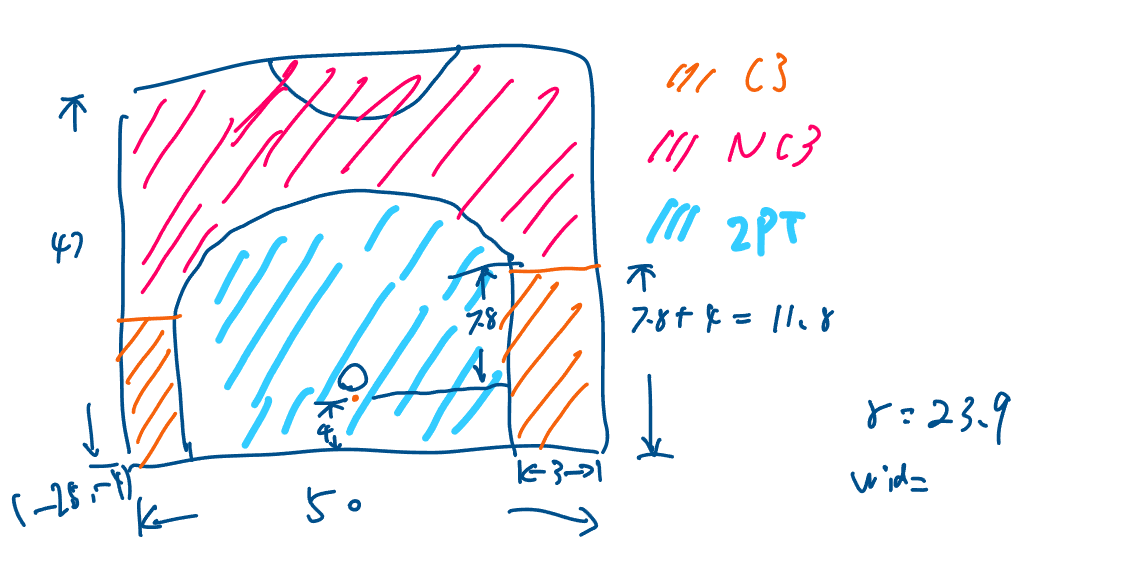


### 3. Draw the court based on the given court diagram

In [6]:
def draw_court(color='#3e82f0', lw=8):
    """ dipict the bb court and highlight C3, NC3 and 2PT area """
    # init setup
    plt.figure(figsize=(15, 15))
    ax = plt.gca()
    hoop = Circle(xy=(0, 0), radius=1.5, linewidth=lw, color=color, fill=False)
    ax.add_patch(hoop)
    
    # board
    board = Rectangle(xy=(-3, -1.5), width=6, height=-0.05, linewidth=lw, color=color, fill=False)
    ax.add_patch(board)
    
    # left C3
    left_c3 = Rectangle(xy=(-22, -4), width=0, height=11.8 + 1.2, linewidth=lw, color=color, fill=False)
    ax.add_patch(left_c3)
    
    # right C3
    right_c3 = Rectangle(xy=(22, -4), width=0, height=11.8 + 1.2, linewidth=lw, color=color, fill=False)
    ax.add_patch(right_c3)
    
    # 3pt line
    line_3pt = Arc(xy=(0, 0), width=23.9 * 2, height=23.9 * 2, theta1=22, theta2=158, linewidth=lw, color=color,
                    fill=False)
    ax.add_patch(line_3pt)
    
    # half cort logo
    logo = Arc(xy=(0, 43), width=12, height=12, theta1=180, theta2=0, linewidth=lw, color=color, fill=False)
    ax.add_patch(logo)
        
    # set court bound
    ax.set_xlim(-25, 25)
    ax.set_ylim(-4, 43)
    
    # C3 Area
    # left C3
    x_c3_left = np.arange(-25, -21)
    # right C3
    x_c3_right = np.arange(22, 26)
    y1 = 7.8 + 0 * x_c3_left
    y2 = -4 + 0 * x_c3_left
    # highlight C3 area
    for x in (x_c3_left, x_c3_right):
        plt.fill_between(x, y1, y2, where=(y2 < y1), facecolor='yellow', alpha=.5)
    
    # 2PT Area
    x_2pt = np.arange(-22, 23)
    y_3pt = np.sqrt(23.75 * 23.75 - np.power(x_2pt, 2))
    y2 = -4 + 0 * x_2pt
    plt.fill_between(x_2pt, y_3pt, y2, where=(y2 < y_3pt), facecolor='blue', alpha=.5)
    
    # highlight NC3 Area
    # left + right conor
    y3 = 43
    for x in (x_c3_left, x_c3_right):
        plt.fill_between(x, y1, y3, where=(y3 > y1), facecolor='red', alpha=.5)
    
    # above 3pt line
    plt.fill_between(x_2pt, y_3pt, y3, where=(y3 > y_3pt), facecolor='red', alpha=.5)
    plt.show()

### 4. Visualize the C3, NC3, and 2PT area
- yellow area is C3
- red is area NC3
- blue is area 2PT
- hoop located at (0, 0) based on the court_diagram.jpg

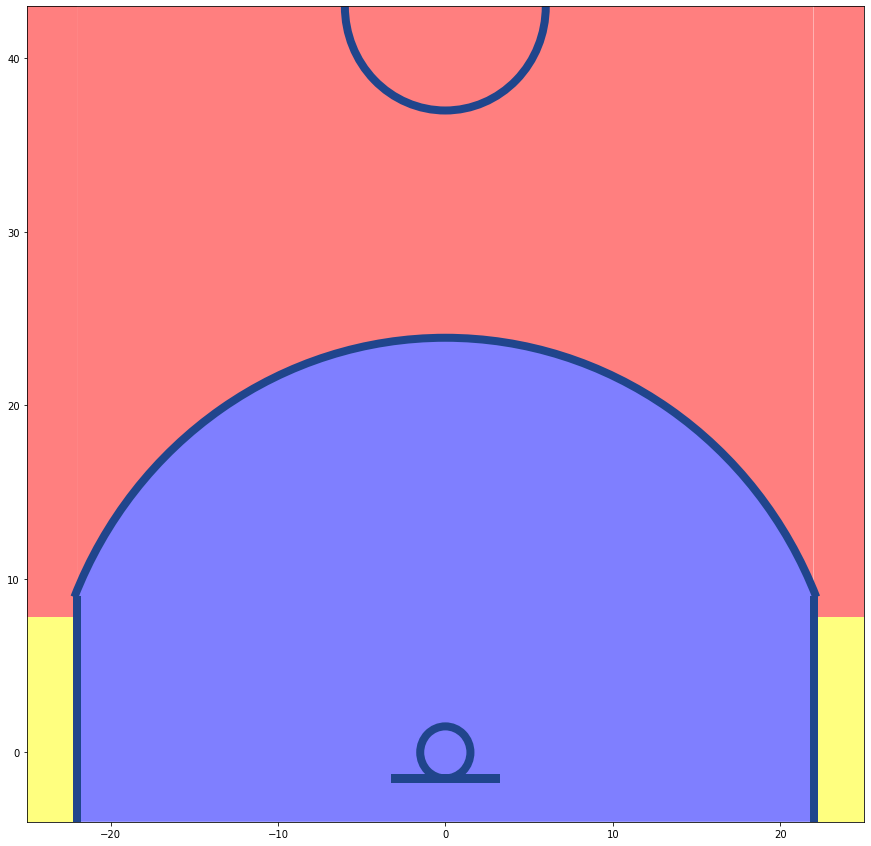

In [8]:
# picked Thunder Blue as default color, court did not do much, but I helps me to visualize the problem
draw_court()

### 5. Now we can get the boundary discriminant function easily

In [13]:
def is_c3(x, y):
    """ return true if fg is c3"""
    return (-25 < x < -22 or 22 < x < 25) and -4 < y < 7.8

In [14]:
def is_nc3(x, y):
    """ return true if fg is nc3"""
    if -25 < x < -22 or 22 < x < 25:
        return y >= 7.8
    else:
        return y > np.sqrt(23.75 * 23.75 - x * x)

In [15]:
def is_2pt(x, y):
    """ return true if fg is 2pt"""
    return (-22 <= x <= 22) and y <= np.sqrt(23.75 * 23.75 - x * x)

### 6. Parse and organize the given shots_data
- special case handling --- did not see any though but it is always good to have this habit
- read data and parse it row by row
- updata relative data in the loop
- plot pie chart to visualize shot distribution
- calculate eFG from different zone
- present data report

In [19]:
def process_data():
    df_shots = pd.read_csv('shots_data.csv')
    print(df_shots.info())
    
    # prepare to parse data 
    team_a_fg, team_a_fg_loc = 0, []
    team_b_fg, team_b_fg_loc = 0, []
    a_c3 = a_nc3 = a_2pt = 0
    a_c3_m = a_nc3_m = a_2pt_m = 0
    b_c3 = b_nc3 = b_2pt = 0
    b_c3_m = b_nc3_m = b_2pt_m = 0
    
    # if there exists any invalid fg, collect the fg data as an outlier
    a_outlier = b_outlier = 0
    
    for i, r in df_shots.iterrows():
        t, x, y, fgm = r[0], r[1], r[2], r[3]
        
        if t == 'Team A':
            team_a_fg += 1
            team_a_fg_loc.append((x, y))
            if is_c3(x, y):
                a_c3 += 1
                if fgm == 1:
                    a_c3_m += 1
            elif is_nc3(x, y):
                a_nc3 += 1
                if fgm == 1:
                    a_nc3_m += 1
            elif is_2pt(x, y):
                a_2pt += 1
                if fgm == 1:
                    a_2pt_m += 1
            else:
                a_outlier += 1

        elif t == 'Team B':
            team_b_fg += 1
            team_b_fg_loc.append((x, y))
            if is_c3(x, y):
                b_c3 += 1
                if fgm == 1:
                    b_c3_m += 1
            elif is_nc3(x, y):
                b_nc3 += 1
                if fgm == 1:
                    b_nc3_m += 1
            elif is_2pt(x, y):
                b_2pt += 1
                if fgm == 1:
                    b_2pt_m += 1
            else:
                b_outlier += 1
    
    # need to calculate the eFG in the parsing loop
    def calc_eFG(team, area):
        """return eFG at given area"""
        eFG = 0
        
        if team == 'A':
            if area == 'C3':
                eFG = 1.5 * a_c3_m / a_c3
            elif area == 'NC3':
                eFG = 1.5 * a_nc3_m / a_nc3
            elif area == '2PT':
                eFG = a_2pt_m / a_2pt
                
        elif team == 'B':
            if area == 'C3':
                eFG = 1.5 * b_c3_m / b_c3
            elif area == 'NC3':
                eFG = 1.5 * b_nc3_m / b_nc3
            elif area == '2PT':
                eFG = b_2pt_m / b_2pt

        return round(eFG, 3)
    
    
    # plot pie chart to show shots distribution
    def plot_shot_distribution(a_size, b_size, labels=('C3', 'NC3', '2PT')):
        """plot pie chart"""
        fig1, ax = plt.subplots(1, 2)
        ax[0].pie(a_size, labels=labels, autopct='%1.3f%%', shadow=True, startangle=90)
        ax[0].axis('equal')
        ax[0].set_title('Team A Shot Distribution')

        ax[1].pie(b_size, labels=labels, autopct='%1.3f%%', shadow=True, startangle=90)
        ax[1].axis('equal')
        ax[1].set_title('Team B Shot Distribution')
        plt.show()
    
    # calculate eFG Team(2) X Zone(3), I dont want to hard code it but I have no time to do it in a fancy way
    a_c3_efg = calc_eFG('A', 'C3')
    a_nc3_efg = calc_eFG('A', 'NC3')
    a_2pt_efg = calc_eFG('A', '2PT')

    b_c3_efg = calc_eFG('B', 'C3')
    b_nc3_efg = calc_eFG('B', 'NC3')
    b_2pt_efg = calc_eFG('B', '2PT')
    # Team A info
    print(f'Team A total: {team_a_fg}, C3M/C3: {a_c3_m}/{a_c3}, NC3M/NC3: {a_nc3_m}/{a_nc3}, 2PTM/2PT: {a_2pt_m}/{a_2pt}, Outlier: {a_outlier}')
    print(f'Team A C3_eFG: {a_c3_efg}, NC3_eFG: {a_nc3_efg}, 2PT_eFG: {a_2pt_efg}')
    # Team B info
    print(f'Team B total: {team_b_fg}, C3M/C3: {b_c3_m}/{b_c3}, NC3M/NC3: {b_nc3_m}/{b_nc3}, 2PTM/2PT: {b_2pt_m}/{b_2pt}, Outlier: {b_outlier}')
    print(f'Team B C3_eFG: {b_c3_efg}, NC3_eFG: {b_nc3_efg}, 2PT_eFG: {b_2pt_efg}')
    plot_shot_distribution([a_c3, a_nc3, a_2pt], [b_c3, b_nc3, b_2pt])

### 7. process data and generate report
- visualize the shots distribution for Team A and Team B
- print eFG data to the stdout, no time to visualize it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    560 non-null    object 
 1   x       560 non-null    float64
 2   y       560 non-null    float64
 3   fgmade  560 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 17.6+ KB
None
Team A total: 280, C3M/C3: 8/20, NC3M/NC3: 29/90, 2PTM/2PT: 68/170, Outlier: 0
Team A C3_eFG: 0.6, NC3_eFG: 0.483, 2PT_eFG: 0.4
Team B total: 280, C3M/C3: 5/21, NC3M/NC3: 35/96, 2PTM/2PT: 75/163, Outlier: 0
Team B C3_eFG: 0.357, NC3_eFG: 0.547, 2PT_eFG: 0.46


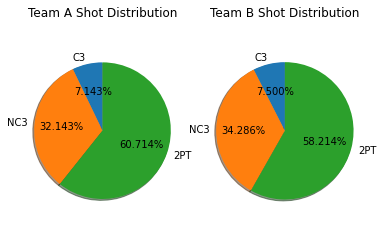

In [20]:
process_data()

### 7. Time Used
I have to mention that I spent 83 min on this(not including the github post), it is more than one hour according to your requirement. If I can get into the next round, I will speed up a little bit.

### 8. Next Steps
- Visualize the FG by plot scatters on the basketball court (Team A/B, FGM/NG）
- When the data set is large enough, do some regression analysis on Teams, maybe more MachineLearning stuff...must be fun
